In [1]:
import pandas as pd
import numpy as np

In [2]:
# Data Gathering

temp_df = pd.read_csv('IMDB Dataset.csv')

#### Data cleaning 

In [3]:
temp_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
temp_df.shape

(50000, 2)

In [5]:
df = temp_df.iloc[:20000]

In [6]:
df.shape

(20000, 2)

In [7]:
df['review'][2]

'I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I\'d laughed at one of Woody\'s comedies in years (dare I say a decade?). While I\'ve never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.'

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [9]:
df.duplicated().sum()

74

In [10]:
df.drop_duplicates(inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_30108\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()

0

#### Preprocessing 

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import re

def remove_tags(text):
    clean_text = re.sub(re.compile('<.*?>'),'',text)
    return clean_text

In [14]:
df['review'] = df['review'].apply(remove_tags)

In [15]:
df['review'][0]  # checking for any tags present.

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

In [16]:
# Converting reveiws into lower case

df['review'] = df['review'].str.lower()
df['review'][2]

'i thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. the plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). while some may be disappointed when they realize this is not match point 2: risk addiction, i thought it was proof that woody allen is still fully in control of the style many of us have grown to love.this was the most i\'d laughed at one of woody\'s comedies in years (dare i say a decade?). while i\'ve never been impressed with scarlet johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.this may not be the crown jewel of his career, but it was wittier than "devil wears prada" and more interesting than "superman" a great comedy to go see with friends.'

In [17]:
# # nltk --> natural language tool kit. 
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# l1 = stopwords.words('english')

# # --------------------------------------------------------

# import string
# string.punctuation

# #-------------------------------------------------------------

# # removing stop words from file. 

# def text_process(mess):
#     '''
#         1. remove the punctuation.
#         2. remove the stopwords. 
#         3. return the list of clean words.
#     '''

#     nopunc = [char for char in mess if char not in string.punctuation] # list  comprehension. 
#     nopunc = "".join(nopunc)

#     return[word for word in nopunc.split() if word not in l1]

In [18]:
import string

def remove_punc(text):
    if isinstance(text, list):
        text = ' '.join(text)  # Convert list to string
    return text.translate(str.maketrans('', '', string.punctuation))



In [30]:
df['review']= df['review'].apply(remove_punc)
df['review'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [34]:
import nltk
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x: " ".join(x))
df['review']

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
19995    ok starters taxi driver amazing taxi driver am...
19996    sort hard say greatly enjoyed targets paper mo...
19997    still liked though warren beatty fair comic bo...
19998    could still use black adder even today imagine...
19999    socalled documentary tries tell usa faked moon...
Name: review, Length: 19926, dtype: object

In [43]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [45]:
df.head(2)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production filming technique ...,positive


In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
# creating bag of words. 
# Vector transformation of words. 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [53]:
# abcd = CountVectorizer(analyzer= text_process).fit(df['review']) 

bow = cv.fit(df['review'])

In [54]:
bow.vocabulary_

{'one': 78586,
 'reviewers': 92231,
 'mentioned': 69713,
 'watching': 119994,
 'oz': 80668,
 'episode': 36574,
 'youll': 124337,
 'hooked': 52893,
 'right': 92679,
 'exactly': 37654,
 'happened': 49623,
 'methe': 70064,
 'first': 41516,
 'thing': 110604,
 'struck': 105865,
 'brutality': 16340,
 'unflinching': 116032,
 'scenes': 95820,
 'violence': 118687,
 'set': 98253,
 'word': 122783,
 'go': 46496,
 'trust': 114243,
 'show': 99589,
 'faint': 39078,
 'hearted': 50540,
 'timid': 111915,
 'pulls': 87887,
 'punches': 87942,
 'regards': 90607,
 'drugs': 33308,
 'sex': 98400,
 'hardcore': 49785,
 'classic': 21589,
 'use': 117220,
 'wordit': 122797,
 'called': 17586,
 'nickname': 75763,
 'given': 46202,
 'oswald': 79626,
 'maximum': 68589,
 'security': 97097,
 'state': 104515,
 'penitentary': 82388,
 'focuses': 42354,
 'mainly': 66840,
 'emerald': 35376,
 'city': 21405,
 'experimental': 38314,
 'section': 97079,
 'prison': 86706,
 'cells': 19285,
 'glass': 46287,
 'fronts': 43893,
 'face': 

In [58]:
# TDM Creation. 

TDM = bow.transform(df['review'])
TDM.shape

(19926, 125045)

In [60]:
# data splitting.

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(TDM,y,test_size=0.2,random_state=1)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15940, 125045)
(15940,)
(3986, 125045)
(3986,)


## Logistic Regression

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1952
           1       0.88      0.88      0.88      2034

    accuracy                           0.88      3986
   macro avg       0.88      0.88      0.88      3986
weighted avg       0.88      0.88      0.88      3986



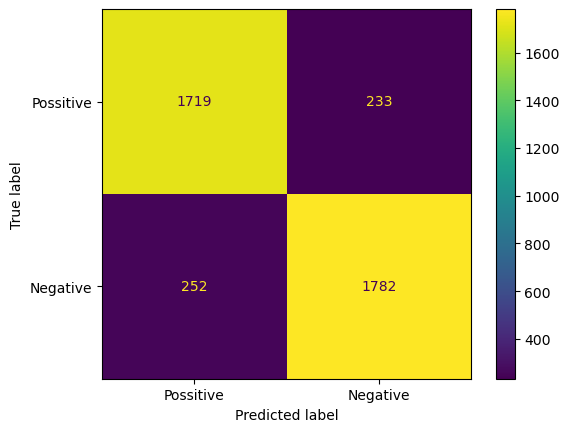

In [72]:
# Model building. 

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

# ------------------------------------------------------------

lr.fit(train_x,train_y)
y_pred_lr = lr.predict(test_x)

# -------------------------------------------------------------

tab_lr = confusion_matrix(test_y,y_pred_lr)
print(classification_report(test_y,y_pred_lr))
ConfusionMatrixDisplay(tab_lr,display_labels=['Possitive','Negative']).plot()

## Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1952
           1       0.89      0.83      0.86      2034

    accuracy                           0.86      3986
   macro avg       0.86      0.86      0.86      3986
weighted avg       0.86      0.86      0.86      3986



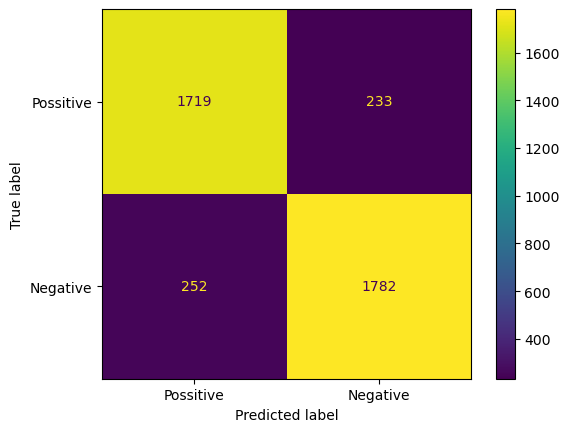

In [74]:
from sklearn.naive_bayes import MultinomialNB
nv = MultinomialNB()

# -----------------------------------------------------
nv.fit(train_x,train_y)
y_pred_nv = nv.predict(test_x)

#-------------------------------------------------------
tab_nv = confusion_matrix(test_y,y_pred_nv)
print(classification_report(test_y,y_pred_nv))
ConfusionMatrixDisplay(tab_lr,display_labels=['Possitive','Negative']).plot()

## Random Forest

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1952
           1       0.89      0.83      0.86      2034

    accuracy                           0.86      3986
   macro avg       0.86      0.86      0.86      3986
weighted avg       0.86      0.86      0.86      3986



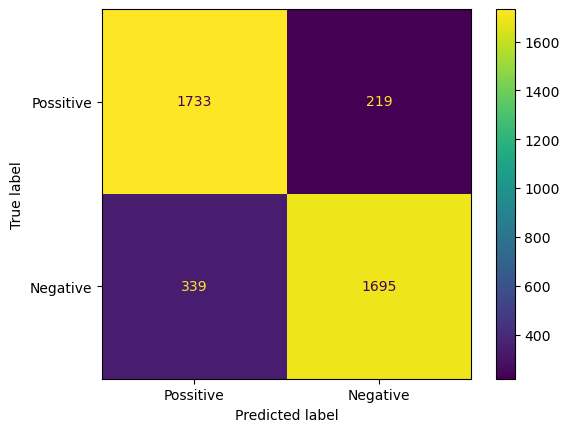

In [77]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()

# --------------------------------------------------------

rm.fit(train_x,train_y)
y_pred_rm = rm.predict(test_x)

# -------------------------------------------------------
tab_rm = confusion_matrix(test_y,y_pred_rm)
print(classification_report(test_y,y_pred_rm))
ConfusionMatrixDisplay(tab_rm,display_labels=['Possitive','Negative']).plot()

In [80]:
param = {'criterion': ['gini','entropy'], 'max_depth' : range(4,9) }

from sklearn.model_selection import RandomizedSearchCV
hp = RandomizedSearchCV(rm,param,verbose=2)

hp.fit(train_x,train_y)
hp.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................criterion=gini, max_depth=4; total time=   2.5s
[CV] END ........................criterion=gini, max_depth=4; total time=   2.4s
[CV] END ........................criterion=gini, max_depth=4; total time=   2.4s
[CV] END ........................criterion=gini, max_depth=4; total time=   2.2s
[CV] END ........................criterion=gini, max_depth=4; total time=   2.2s
[CV] END ........................criterion=gini, max_depth=5; total time=   3.0s
[CV] END ........................criterion=gini, max_depth=5; total time=   2.8s
[CV] END ........................criterion=gini, max_depth=5; total time=   2.8s
[CV] END ........................criterion=gini, max_depth=5; total time=   2.6s
[CV] END ........................criterion=gini, max_depth=5; total time=   2.7s
[CV] END ........................criterion=gini, max_depth=6; total time=   3.4s
[CV] END ........................criterion=gini,

{'max_depth': 8, 'criterion': 'gini'}

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1952
           1       0.87      0.77      0.82      2034

    accuracy                           0.83      3986
   macro avg       0.83      0.83      0.83      3986
weighted avg       0.83      0.83      0.83      3986



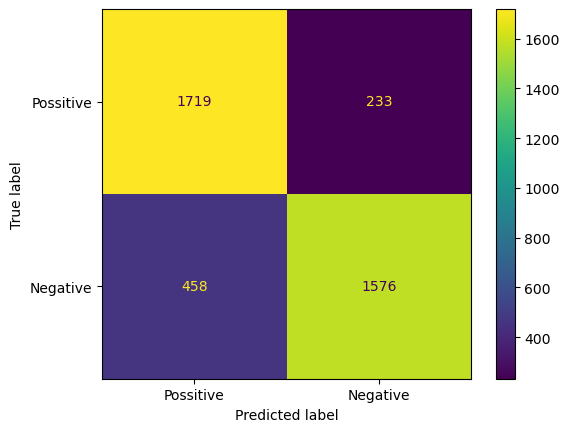

In [84]:
rm_hp = RandomForestClassifier(criterion='gini',max_depth= 8)
# --------------------------------------------------------

rm_hp.fit(train_x,train_y)
y_pred_rm_hp = rm_hp.predict(test_x)

# -------------------------------------------------------
tab_rm_hp = confusion_matrix(test_y,y_pred_rm_hp)
print(classification_report(test_y,y_pred_rm_hp))
ConfusionMatrixDisplay(tab_rm_hp,display_labels=['Possitive','Negative']).plot()

# Vectorization using n-gram

In [86]:
cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

bow_1 = cv.fit(df['review'])
TDM_1 = bow_1.transform(df['review'])

# data splitting.

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(TDM_1,y,test_size=0.2,random_state=1)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15940, 5000)
(15940,)
(3986, 5000)
(3986,)


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1952
           1       0.86      0.85      0.86      2034

    accuracy                           0.85      3986
   macro avg       0.85      0.85      0.85      3986
weighted avg       0.85      0.85      0.85      3986



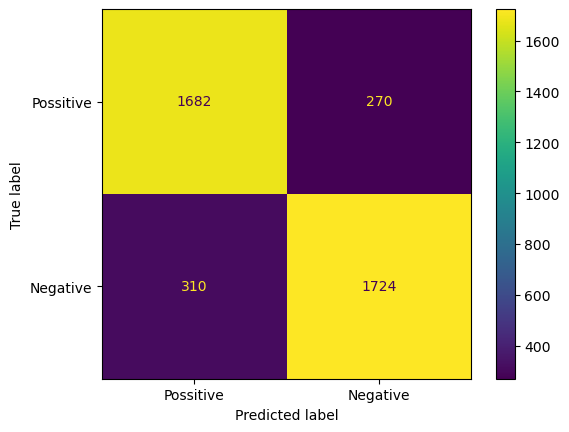

In [87]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

# ------------------------------------------------------------

lr.fit(train_x,train_y)
y_pred_lr = lr.predict(test_x)

# -------------------------------------------------------------

tab_lr = confusion_matrix(test_y,y_pred_lr)
print(classification_report(test_y,y_pred_lr))
ConfusionMatrixDisplay(tab_lr,display_labels=['Possitive','Negative']).plot()

# Vectorization using Tf-idf 

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [92]:
abcd = tfidf.fit(df['review'])

TDM_2 = abcd.transform(df['review'])

In [93]:
TDM_2.shape

(19926, 125045)

In [94]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(TDM_2,y,test_size=0.2,random_state=1)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(15940, 125045)
(15940,)
(3986, 125045)
(3986,)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1952
           1       0.89      0.90      0.90      2034

    accuracy                           0.89      3986
   macro avg       0.89      0.89      0.89      3986
weighted avg       0.89      0.89      0.89      3986



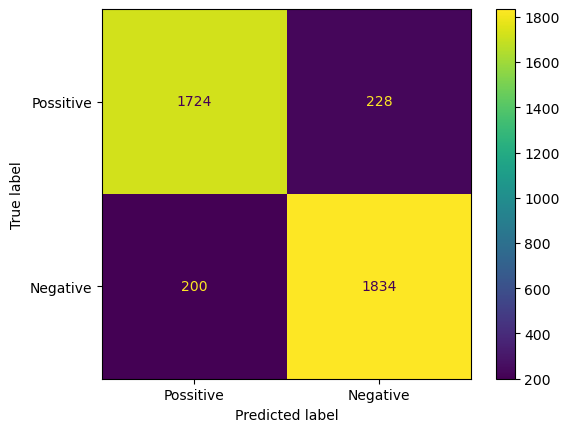

In [95]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

# ------------------------------------------------------------

lr.fit(train_x,train_y)
y_pred_lr = lr.predict(test_x)

# -------------------------------------------------------------

tab_lr = confusion_matrix(test_y,y_pred_lr)
print(classification_report(test_y,y_pred_lr))
ConfusionMatrixDisplay(tab_lr,display_labels=['Possitive','Negative']).plot()